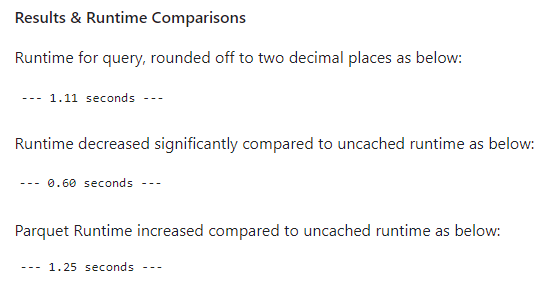

In [1]:
# Importing packages
import os
# Finding the latest version of spark on http://www.apache.org/dist/spark/ which is 'spark-3.5.0'
spark_version = 'spark-3.5.0'
os.environ['SPARK_VERSION']=spark_version

# Installing Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Setting Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Importing findspark and initializing
import findspark
findspark.init()

# Importing `time` module which provides time-related functions
import time
start_time = time.time()

# !wget -q https://dlcdn.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
# !tar xf spark-3.5.0-bin-hadoop3.tgz
# !pip install -q findspark
# !pip install pyspark
# !pip install py4j
# import os
# import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

# Start a SparkSession
# import findspark
# findspark.init()

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,333 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy/main Sources [2,268 kB]
Get:13 http://archive.ubuntu.com/ubuntu 

In [2]:
# Importing packages
from pyspark.sql import SparkSession
import time

# Creating a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

In [3]:
# 1. Reading in the AWS S3 bucket into a DataFrame.
from pyspark import SparkFiles
url = "https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-classroom/v1.2/22-big-data/home_sales_revised.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("home_sales_revised.csv"), sep=",", header=True)
df.show()


+--------------------+----------+----------+------+--------+---------+-----------+--------+------+----------+----+
|                  id|      date|date_built| price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|
+--------------------+----------+----------+------+--------+---------+-----------+--------+------+----------+----+
|f8a53099-ba1c-47d...|2022-04-08|      2016|936923|       4|        3|       3167|   11733|     2|         1|  76|
|7530a2d8-1ae3-451...|2021-06-13|      2013|379628|       2|        2|       2235|   14384|     1|         0|  23|
|43de979c-0bf0-4c9...|2019-04-12|      2014|417866|       2|        2|       2127|   10575|     2|         0|   0|
|b672c137-b88c-48b...|2019-10-16|      2016|239895|       2|        2|       1631|   11149|     2|         0|   0|
|e0726d4d-d595-407...|2022-01-08|      2017|424418|       3|        2|       2249|   13878|     2|         0|   4|
|5aa00529-0533-46b...|2019-01-30|      2017|218712|       2|        3|       196

In [4]:
# 2. Creating a temporary view of the DataFrame
df.createOrReplaceTempView('home_sales')


In [5]:
# 3. The average price for a four bedroom house sold in each year rounded to two decimal places
avg_price_for_4_bedroom = spark.sql("SELECT ROUND(AVG(price),2) AS AVG_PRICE, YEAR(date) AS YEAR FROM home_sales WHERE bedrooms == 4 GROUP by YEAR ORDER by YEAR DESC")
avg_price_for_4_bedroom.show()

+---------+----+
|AVG_PRICE|YEAR|
+---------+----+
|296363.88|2022|
|301819.44|2021|
|298353.78|2020|
| 300263.7|2019|
+---------+----+



In [6]:
# 4. The average price of a home for each year the home was built that have 3 bedrooms and 3 bathrooms rounded to two decimal places
avg_price_for_3bed_3bath = spark.sql("SELECT ROUND(AVG(price),2) AS AVG_PRICE, YEAR(date_built) AS YEAR FROM home_sales WHERE bedrooms == 3 and bathrooms == 3 GROUP by YEAR ORDER by YEAR DESC")
avg_price_for_3bed_3bath.show()

+---------+----+
|AVG_PRICE|YEAR|
+---------+----+
|292676.79|2017|
|290555.07|2016|
| 288770.3|2015|
|290852.27|2014|
|295962.27|2013|
|293683.19|2012|
|291117.47|2011|
|292859.62|2010|
+---------+----+



In [7]:
# 5. The average price of a home for each year built that have 3 bedrooms, 3 bathrooms, with two floors,
# and are greater than or equal to 2,000 square feet rounded to two decimal places
avg_price_for_3bed_3bath_2floor = spark.sql("SELECT ROUND(AVG(price),2) AS AVG_PRICE, YEAR(date_built) AS BUILT_YEAR FROM home_sales WHERE bedrooms == 3 and bathrooms == 3 and sqft_living >= 2000 and floors == 2 GROUP by BUILT_YEAR ORDER by BUILT_YEAR DESC")
avg_price_for_3bed_3bath_2floor.show()


+---------+----------+
|AVG_PRICE|BUILT_YEAR|
+---------+----------+
|280317.58|      2017|
| 293965.1|      2016|
|297609.97|      2015|
|298264.72|      2014|
|303676.79|      2013|
|307539.97|      2012|
|276553.81|      2011|
|285010.22|      2010|
+---------+----------+



In [8]:
# 6. The "view" ratings for the average price of a home, rounded to two decimal places, where the homes are greater than
# or equal to $350,000 and determining the run time for this query

start_time = time.time()

view_avg_price= spark.sql("SELECT ROUND(AVG(price),2) AS AVG_PRICE, view AS View_Rating FROM home_sales GROUP by View_Rating HAVING AVG_PRICE >=350000 ORDER by View_Rating DESC")
view_avg_price.show()

elapsed_time = time.time() - start_time
rounded_elapsed_time = round(elapsed_time, 2)

print("--- %.2f seconds ---" % rounded_elapsed_time)

# print("--- %s seconds ---" % (time.time() - start_time))

+----------+-----------+
| AVG_PRICE|View_Rating|
+----------+-----------+
|1061201.42|         99|
|1053739.33|         98|
|1129040.15|         97|
|1017815.92|         96|
| 1054325.6|         95|
| 1033536.2|         94|
|1026006.06|         93|
| 970402.55|         92|
|1137372.73|         91|
|1062654.16|         90|
|1107839.15|         89|
|1031719.35|         88|
| 1072285.2|         87|
|1070444.25|         86|
|1056336.74|         85|
|1117233.13|         84|
|1033965.93|         83|
| 1063498.0|         82|
|1053472.79|         81|
| 991767.38|         80|
+----------+-----------+
only showing top 20 rows

--- 1.11 seconds ---


In [9]:
# 7. Cached the temporary table home_sales
spark.sql("CACHE table home_sales")

DataFrame[]

In [10]:
# 8. Checking if the table is cached
spark.catalog.isCached('home_sales')

True

In [11]:
# 9. Using the cached data, running the query that filters out the view ratings with average price
#  greater than or equal to $350,000. Determining the runtime and comparing it to uncached runtime

start_time = time.time()

view_avg_price2= spark.sql("SELECT ROUND(AVG(price),2) AS AVG_PRICE, view AS View_Rating FROM home_sales GROUP by View_Rating HAVING AVG_PRICE >=350000 ORDER by View_Rating DESC")
view_avg_price2.show()

elapsed_time = time.time() - start_time
rounded_elapsed_time = round(elapsed_time, 2)

print("--- %.2f seconds ---" % rounded_elapsed_time)

# print("--- %s seconds ---" % (time.time() - start_time))

+----------+-----------+
| AVG_PRICE|View_Rating|
+----------+-----------+
|1061201.42|         99|
|1053739.33|         98|
|1129040.15|         97|
|1017815.92|         96|
| 1054325.6|         95|
| 1033536.2|         94|
|1026006.06|         93|
| 970402.55|         92|
|1137372.73|         91|
|1062654.16|         90|
|1107839.15|         89|
|1031719.35|         88|
| 1072285.2|         87|
|1070444.25|         86|
|1056336.74|         85|
|1117233.13|         84|
|1033965.93|         83|
| 1063498.0|         82|
|1053472.79|         81|
| 991767.38|         80|
+----------+-----------+
only showing top 20 rows

--- 0.60 seconds ---


In [12]:
# 10. Partitioning by the "date_built" field on the formatted parquet home_sales data
df.write.partitionBy("date_built").parquet("part_home_sales", mode="overwrite")


In [13]:
# 11. Reading the parquet formatted data
Parquet_home_sales_df = spark.read.parquet("part_home_sales")


In [14]:
# 12. Creating a temporary table for the parquet data
Parquet_home_sales_df.createOrReplaceTempView("part_home_sales")


In [15]:
# 13. Run the query that filters out the view ratings with average price of greater than or equal to $350,000
# with the parquet DataFrame. Round your average to two decimal places
# Determining the runtime and comparing it to the cached version

start_time = time.time()

view_avg_price_parq= spark.sql("SELECT ROUND(AVG(price),2) AS AVG_PRICE, view AS View_Rating FROM part_home_sales GROUP by View_Rating HAVING AVG_PRICE >=350000 ORDER by View_Rating DESC")
view_avg_price_parq.show()

elapsed_time = time.time() - start_time
rounded_elapsed_time = round(elapsed_time, 2)

print("--- %.2f seconds ---" % rounded_elapsed_time)
# print("--- %s seconds ---" % (time.time() - start_time))

+----------+-----------+
| AVG_PRICE|View_Rating|
+----------+-----------+
|1061201.42|         99|
|1053739.33|         98|
|1129040.15|         97|
|1017815.92|         96|
| 1054325.6|         95|
| 1033536.2|         94|
|1026006.06|         93|
| 970402.55|         92|
|1137372.73|         91|
|1062654.16|         90|
|1107839.15|         89|
|1031719.35|         88|
| 1072285.2|         87|
|1070444.25|         86|
|1056336.74|         85|
|1117233.13|         84|
|1033965.93|         83|
| 1063498.0|         82|
|1053472.79|         81|
| 991767.38|         80|
+----------+-----------+
only showing top 20 rows

--- 1.25 seconds ---


In [16]:
# 14. Uncached the home_sales temporary table
spark.sql("CACHE table home_sales")


DataFrame[]

In [17]:
# 15. Checking if the home_sales is no longer cached
spark.catalog.isCached('home_sales')


True